### Idea: applying face alignment to improve CNN 
#### However, I did not end completing my goal as I encountered many difficulites and spend too much time on this feature. 

**Aim:** Let's check if the classifier will be better if we align the faces, as we do not know if the classifier looks at face features, pixels or other details. Because clearly it is not a transparent AI. I read and used about the face alignment code s from https://www.geeksforgeeks.org/face-alignment-with-opencv-and-python/ by abhilashgau,and I  utilised the face.py code from Louis Busby, STEM for Creatives 23/24 Week 8, you can find the repository here:https://git.arts.ac.uk/lmccallum/STEM-4-Creatives-23-24/blob/main/faces.py 

**Outcome** When I followed the different strategies it ended up working only after a lot of troubleshooting and with some sample images only, at the end I couldn't find out why the face was rotated wrongly and when I tried to create a loopn to run through all my images and return them aligned I encountered error I couldn't fix with additional help. After an tutorial I decided to work with the video content instead. However, i do know that the face alignment function is a popular choice when classifying faces. Thus, there must be an easy solution to my problem which I currently probably just oversee. It already worked better after importing my code to a new notebook instead of working in the first CNN notebook where I work with Resnet-18. However I decided to not move forward with this project aim to instead focus as previously described on the Video data gathering. 

In [1]:
#Instead of doing the face alignment function in one notebook, I will do it here. In the hope to avoid errors. 
# install and import above modules first
import os
import cv2
import math
import matplotlib.pyplot as pl
import pandas as pd
from PIL import Image
import numpy as np
from PIL import Image, UnidentifiedImageError

In [4]:
#following code is from greek for geeks 
# https://www.geeksforgeeks.org/face-alignment-with-opencv-and-python/ by abhilashgau,

# Defining my paths
image_path = '/Users/jillcakmak/Documents/GitHub/AI_Project/image_data'
new_image_path = '/Users/jillcakmak/Documents/GitHub/AI_Project/images_transformed'

# Detect face
def face_detection(img):
	faces = face_detector.detectMultiScale(img, 1.1, 4)
	if (len(faces) <= 0):
		img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #detection only works in grey scale 
		return img, img_gray  
	else:
		X, Y, W, H = faces[0]
		img = img[int(Y):int(Y+H), int(X):int(X+W)]
		return img, cv2.cvtColor(img, cv2.COLOR_BGR2BGRA)


def trignometry_for_distance(a, b):
	return math.sqrt(((b[0] - a[0]) * (b[0] - a[0])) +\
					((b[1] - a[1]) * (b[1] - a[1])))

# Find eyes
def Face_Alignment(image_path):
	print(image_path)
	#read image and include if statements in case it is none 
	img_raw = cv2.imread(image_path).copy() #we make a copy as statet in geeks for geeks 
	print(type(img_raw))
	if img_raw is None: 
		print (f"Image {image_path} cannot be read")
		return None 
	
	img, gray_img = face_detection(cv2.imread(image_path))
	if img is None: 
		print (f"Face {image_path} cannot be detected")
		return None 
	
	eyes = eye_detector.detectMultiScale(gray_img)
	if len(eyes) >= 2:
		eye = eyes[:, 2]
		container1 = []
		for i in range(0, len(eye)):
			container = (eye[i], i)
			container1.append(container)
		df = pd.DataFrame(container1, columns=[
						"length", "idx"]).sort_values(by=['length'])
		eyes = eyes[df.idx.values[0:2]]

		# deciding to choose left and right eye
		eye_1 = eyes[0]
		eye_2 = eyes[1]
		if eye_1[0] > eye_2[0]:
			left_eye = eye_2
			right_eye = eye_1
		else:
			left_eye = eye_1
			right_eye = eye_2

		# center of eyes
		# center of right eye
		right_eye_center = (
			int(right_eye[0] + (right_eye[2]/2)), 
		int(right_eye[1] + (right_eye[3]/2)))
		right_eye_x = right_eye_center[0]
		right_eye_y = right_eye_center[1]
		cv2.circle(img, right_eye_center, 2, (255, 0, 0), 3)

		# center of left eye
		left_eye_center = (
			int(left_eye[0] + (left_eye[2] / 2)), 
		int(left_eye[1] + (left_eye[3] / 2)))
		left_eye_x = left_eye_center[0]
		left_eye_y = left_eye_center[1]
		cv2.circle(img, left_eye_center, 2, (255, 0, 0), 3)

		# finding rotation direction
		if left_eye_y > right_eye_y:
			print("Rotate image to clock direction")
			point_3rd = (right_eye_x, left_eye_y)
			direction = -1 # rotate image direction to clock
		else:
			print("Rotate to inverse clock direction")
			point_3rd = (left_eye_x, right_eye_y)
			direction = 1 # rotate inverse direction of clock

		cv2.circle(img, point_3rd, 2, (255, 0, 0), 2)
		a = trignometry_for_distance(left_eye_center, 
									point_3rd)
		b = trignometry_for_distance(right_eye_center, 
									point_3rd)
		c = trignometry_for_distance(right_eye_center, 
									left_eye_center)
		cos_a = (b*b + c*c - a*a)/(2*b*c)
		angle = (np.arccos(cos_a) * 180) / math.pi

		if direction == -1:
			angle = 90 - angle
		else:
			angle = -(90-angle)

		# rotate image
		new_img = Image.fromarray(img_raw)
		new_img = np.array(new_img.rotate(direction * angle))

	return new_img

/Users/jillcakmak/Documents/GitHub/AI_Project/image_data/fake/easy_59_0010.jpg
<class 'numpy.ndarray'>
Rotate to inverse clock direction


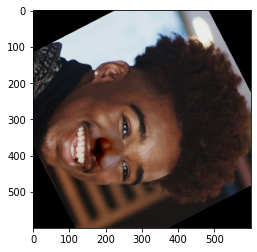

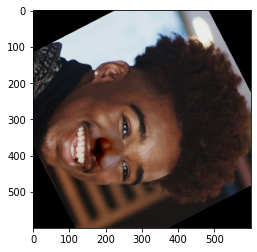

In [5]:
 
opencv_home = cv2.__file__
folders = opencv_home.split(os.path.sep)[0:-1]
path = folders[0]
for folder in folders[1:]:
    path = path + "/" + folder
path_for_face = path+"/data/haarcascade_frontalface_default.xml"
path_for_eyes = path+"/data/haarcascade_eye.xml"
path_for_nose = path+"/data/haarcascade_mcs_nose.xml"
 
if os.path.isfile(path_for_face) != True:
    raise ValueError(
        "opencv is not installed pls install using pip install opencv ", 
      detector_path, " violated.")
 
face_detector = cv2.CascadeClassifier(path_for_face)
eye_detector = cv2.CascadeClassifier(path_for_eyes)
nose_detector = cv2.CascadeClassifier(path_for_nose)
 
# Name of the image for face alignment if on 
# the other folder kindly paste the name of
# the image with path included
test_set = ["/Users/jillcakmak/Documents/GitHub/AI_Project/image_data/fake/easy_59_0010.jpg"]
for i in test_set:
    alignedFace = Face_Alignment(i)
    pl.imshow(alignedFace[:, :, ::-1])
    pl.show()
    img, gray_img = face_detection(alignedFace)
    pl.imshow(img[:, :, ::-1])
    pl.show()

As you can see the face alignment does not work perfectly, or there is something wrong in my code. Nevertheless, I will loop through my data save it in a new path as described and then check if the cnn will work better

In [12]:
# Defining my paths
image_path = '/Users/jillcakmak/Documents/GitHub/AI_Project/image_data'
new_image_path = '/Users/jillcakmak/Documents/GitHub/AI_Project/images_transformed'

In [15]:
#Basis of code from Stackoverflow (https://stackoverflow.com/questions/63701971/how-to-loop-through-subdirectories-filled-with-images-and-assign-a-function-to-e)
for file in os.listdir(image_path): # Gives the list of all files inside the 'subfolder' directory
    #img = Image.open(image_path,file)
    img = cv2.imread(os.path.join(image_path, file))
    alignedFace = Face_Alignment(img)
    img, gray_img = face_detection(alignedFace)
    #img = np.asarray(img) # If your align_face function works with numpy arrays
    new_img = alignedFace(img)
    #new_img = Image.fromarray(np.uint8(new_img)) # If your align_face function returns a numpy array
    new_img.save(os.path.join(new_image_path, file)) 

None


AttributeError: 'NoneType' object has no attribute 'copy'